Source: https://github.com/hb20007/hands-on-nltk-tutorial/blob/master/1-2-Text-Analysis-Using-nltk.text.ipynb

# Extracting Interesting Data from a Given Text

## Text Analysis Using nltk.text

In [2]:
from nltk.tokenize import word_tokenize
from nltk.text import Text

In [3]:
my_string = "Two plus two is four, minus one that's three — quick maths. Every day man's on the block. Smoke trees. See your girl in the park, that girl is an uckers. When the thing went quack quack quack, your men were ducking! Hold tight Asznee, my brother. He's got a pumpy. Hold tight my man, my guy. He's got a frisbee. I trap, trap, trap on the phone. Moving that cornflakes, rice crispies. Hold tight my girl Whitney."

# Tokenize the text
tokens = word_tokenize(my_string) 
tokens

['Two',
 'plus',
 'two',
 'is',
 'four',
 ',',
 'minus',
 'one',
 'that',
 "'s",
 'three',
 '—',
 'quick',
 'maths',
 '.',
 'Every',
 'day',
 'man',
 "'s",
 'on',
 'the',
 'block',
 '.',
 'Smoke',
 'trees',
 '.',
 'See',
 'your',
 'girl',
 'in',
 'the',
 'park',
 ',',
 'that',
 'girl',
 'is',
 'an',
 'uckers',
 '.',
 'When',
 'the',
 'thing',
 'went',
 'quack',
 'quack',
 'quack',
 ',',
 'your',
 'men',
 'were',
 'ducking',
 '!',
 'Hold',
 'tight',
 'Asznee',
 ',',
 'my',
 'brother',
 '.',
 'He',
 "'s",
 'got',
 'a',
 'pumpy',
 '.',
 'Hold',
 'tight',
 'my',
 'man',
 ',',
 'my',
 'guy',
 '.',
 'He',
 "'s",
 'got',
 'a',
 'frisbee',
 '.',
 'I',
 'trap',
 ',',
 'trap',
 ',',
 'trap',
 'on',
 'the',
 'phone',
 '.',
 'Moving',
 'that',
 'cornflakes',
 ',',
 'rice',
 'crispies',
 '.',
 'Hold',
 'tight',
 'my',
 'girl',
 'Whitney',
 '.']

In [8]:
tokens = [word.lower() for word in tokens] # Convert every word to lowercase
tokens[:10]

['two', 'plus', 'two', 'is', 'four', ',', 'minus', 'one', 'that', "'s"]

In [9]:
t = Text(tokens)
t

<Text: two plus two is four , minus one...>

### Concordance
There are many ways to examine the context of a text apart from simply reading it. A concordance view shows us every occurrence of a given word, together with some context.

In [13]:
t.concordance('uckers')

Displaying 1 of 1 matches:
 girl in the park , that girl is an uckers . when the thing went quack quack q


### Collocations
A collocation is a sequence of words that occur together unusually often. Thus red wine is a collocation, whereas the wine is not. A characteristic of collocations is that they are resistant to substitution with words that have similar senses; for example, maroon wine sounds definitely odd.

In [15]:
t.collocations()

hold tight; quack quack


### Count

In [16]:
t.count('quack')

3

### Index

In [19]:
t.index('two')

0

### Similar
What other words appear in a similar range of contexts? 

In [20]:
t.similar('brother')

guy


### Dispersion Plot
Where is a particular word being used? Is it more in the beginning of the text? Or at the end of the text? Determine the location of a word in the text: how many words from the beginning it appears.

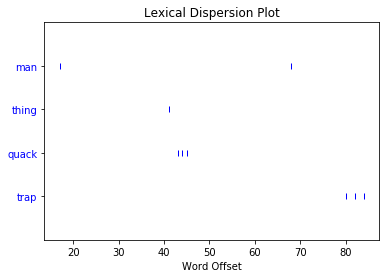

In [26]:
'''Note
Important: You need to have Python's NumPy and Matplotlib packages installed in order to produce the graphical plots '''
import numpy
import matplotlib.pyplot
t.dispersion_plot(['man', 'thing', 'quack', 'trap']) 

### Graphical plot of the frequency distribution

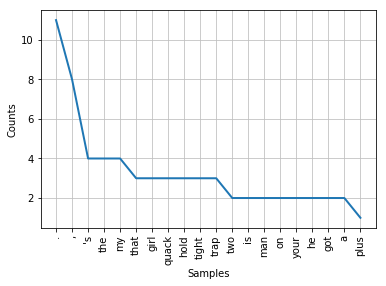

In [27]:
t.plot(20) # Plots 20 most common tokens

### Frequency Distribution

In [55]:
from nltk import FreqDist
freq_dist = FreqDist(t)
freq_dist

for token in freq_dist:
    print(freq_dist[token], token)

2 two
1 plus
2 is
1 four
8 ,
1 minus
1 one
3 that
4 's
1 three
1 —
1 quick
1 maths
11 .
1 every
1 day
2 man
2 on
4 the
1 block
1 smoke
1 trees
1 see
2 your
3 girl
1 in
1 park
1 an
1 uckers
1 when
1 thing
1 went
3 quack
1 men
1 were
1 ducking
1 !
3 hold
3 tight
1 asznee
4 my
1 brother
2 he
2 got
2 a
1 pumpy
1 guy
1 frisbee
1 i
3 trap
1 phone
1 moving
1 cornflakes
1 rice
1 crispies
1 whitney


In [59]:
freq_dist.most_common(5)

[('.', 11), (',', 8), ("'s", 4), ('the', 4), ('my', 4)]

### Common Contexts
common_contexts shows when the use of a list of words share the same surrounding words.
The text above is too small so we will use a bigger one.

NLTK comes with several interesting corpora, which are large collections of text. You can check out what kinds of corpora are found in nltk.corpus in Section 1 of <a href="http://www.nltk.org/book/ch02.html" target="_blank">NLTK's docs.</a>

We will use the **reuters** corpora. 
The Reuters Corpus contains 10,788 news documents totaling 1.3 million words.

In [63]:
from nltk.corpus import reuters
text = Text(reuters.words()) # Read data in from corpus.
text[:14] # The first handful of words in each of these texts are titles, which are stored as upper case.

['ASIAN',
 'EXPORTERS',
 'FEAR',
 'DAMAGE',
 'FROM',
 'U',
 '.',
 'S',
 '.-',
 'JAPAN',
 'RIFT',
 'Mounting',
 'trade',
 'friction']

In [67]:
text.common_contexts(['August', 'June'])

in_1986 and_and by_. begins_1 paid_1986 in_, early_. or_, /_shipment
of_. last_. for_shipment for_to on_3 on_12 on_19 last_when in_.
in_1987 -_.


**This result tells us that the phrases "in August 1986" and "in June 1986" both appear in Reuters.
As well as
"begins August 1" and "begins June 1" 
etc etc.**